# Exploring child mortality: Causes of death in children under 5 years of age.

Esta notebook sirve como un tutorial de cómo realizo una exploración de datos y la respectiva visualización en Matplotllib y Seaborn. Aquí se encuentran consejos y prácticas (no son necesarimente buenas) que hago. 

Espero que le sirva a las personas que buscan proyectos o pequeñas tareas para practicar con las librerías básicas de Análisis de Datos (Pandas, NumPy, Matplotlib y Seaborn)

## Importamos librerias de manipulación de datos

In [1]:
import numpy as np
import pandas as pd

## Cargamos los datos

In [2]:
df = pd.read_csv("./../../data/causes-of-death-in-children-under-5.csv")
df

,Entity,Code,Year,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),...,Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,AFG,1990,48,105,1779,718,431,8649,477,...,7112,2455,3968,131,802,808,10,776,21,123
1,Afghanistan,AFG,1991,55,130,1822,741,439,8669,495,...,7574,2385,4650,129,781,800,12,748,41,132
2,Afghanistan,AFG,1992,68,155,2069,836,486,8539,554,...,8614,2370,5833,137,821,863,13,777,51,180
3,Afghanistan,AFG,1993,78,178,2427,970,549,8949,630,...,9458,2659,7800,155,923,979,16,872,24,239
4,Afghanistan,AFG,1994,83,194,2649,1063,589,10642,681,...,9823,3187,7894,170,1015,1064,19,961,52,259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,Zimbabwe,ZWE,2015,107,31,1733,17,56,615,92,...,2269,518,1345,114,115,799,2178,126,1475,399
8216,Zimbabwe,ZWE,2016,112,32,1771,18,58,369,95,...,2249,559,1286,119,120,787,1827,133,1219,398
8217,Zimbabwe,ZWE,2017,111,32,1714,17,58,261,94,...,2245,544,1248,117,119,745,1658,133,1249,394
8218,Zimbabwe,ZWE,2018,109,31,1639,16,58,340,91,...,2203,568,1136,114,115,693,1458,129,1213,397


## Tip: Mostrar todas las columnas (o un determinado número de ellas)

Al simplemente llamar a la variable **df**, se van a desplegar un determinado número de filas y de columnas. A pesar de que quizás no queramos ver todas las filas, muchas veces vamos a querer ver todas las columnas. Para eso ejecutamos la siguiente línea de código.

```Python
pd.set_option('display.max_columns', AAA)
```

donde `AAA` es el número de columnas que querramos ver

In [3]:
pd.set_option('display.max_columns', 35)

Ahora ya podremos llamar a nuetro _data frame_ y observaremos todas las columnas.

In [4]:
# Solamente queremos ver 5 filas 
df.head(5)

,Entity,Code,Year,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number),Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number),Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number),Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: Under 5 (Number),Deaths - Diabetes mellitus - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number),Deaths - Meningitis - Sex: Both - Age: Under 5 (Number),Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
0,Afghanistan,AFG,1990,48,105,1779,718,431,8649,477,182,211,225,12850,20224,6088,5,420,0,29,1599,1709,7112,2455,3968,131,802,808,10,776,21,123
1,Afghanistan,AFG,1991,55,130,1822,741,439,8669,495,181,212,229,13701,20879,6791,3,520,185,32,1804,1743,7574,2385,4650,129,781,800,12,748,41,132
2,Afghanistan,AFG,1992,68,155,2069,836,486,8539,554,192,231,255,15812,23585,8098,1,662,91,37,2160,1954,8614,2370,5833,137,821,863,13,777,51,180
3,Afghanistan,AFG,1993,78,178,2427,970,549,8949,630,216,262,291,17855,27116,9142,1,723,36,42,2414,2252,9458,2659,7800,155,923,979,16,872,24,239
4,Afghanistan,AFG,1994,83,194,2649,1063,589,10642,681,238,281,313,18835,29271,9575,1,736,27,43,2519,2446,9823,3187,7894,170,1015,1064,19,961,52,259


### Nota

Para este caso en específico no es tan necesario observar todas las columnas, ya que todas las casi todas columnas son de valor númerico y simplemente podemos ejecutar

```Python
df.columns
```
para ver todos los nombres, sin embargo, no siempre es el caso. Recomiendo mucho visualizar todas las columnas (si son menos de 50) para tener una primera idea de los tipos de datos con los que se van a trabajar.

## Explorar valores nulos/vacíos

Para explorar valores o vacíos hay dos maneras: `df.isnull()` o `df.isna()`, ambas funcionan de la misma manera: detectan valores nulos $\to$ si es valor vacío lo marca con un `True` y si no lo es, lo marca con un `False`.

Yo prefiero `isnull` por el simple hecho de que fue el primero que aprendí y con ese me quedé.

In [5]:
# Solamente usar isnull nos devolverá el dataframe con False y True en cada celda
# por lo que agregamos el sum() para sumar todos los True (los valores nulos) de cada columna
df.isnull().sum()

Entity                                                                                                      0
Code                                                                                                     2070
Year                                                                                                        0
Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number)                       0
Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number)                                         0
Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number)                                       0
Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number)                                                0
Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number)                                                      0
Deaths - Measles - Sex: Both - Age: Under 5 (Number)                                                        0
Deaths - D

Podemos ver que la columna de **Code** tiene la mayor cantidad de valores nulos, así que es buena idea ir a explorarla

In [6]:
# Creamos una máscara que nos muestre solo las celdas donde hallan valores 
# nulos en Code
mask_null_code = df['Code'].isnull()

# Mostramos ese data frame
df[mask_null_code]

,Entity,Code,Year,Deaths - Invasive Non-typhoidal Salmonella (iNTS) - Sex: Both - Age: Under 5 (Number),Deaths - Interpersonal violence - Sex: Both - Age: Under 5 (Number),Deaths - Nutritional deficiencies - Sex: Both - Age: Under 5 (Number),Deaths - Acute hepatitis - Sex: Both - Age: Under 5 (Number),Deaths - Neoplasms - Sex: Both - Age: Under 5 (Number),Deaths - Measles - Sex: Both - Age: Under 5 (Number),Deaths - Digestive diseases - Sex: Both - Age: Under 5 (Number),Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: Under 5 (Number),Deaths - Chronic kidney disease - Sex: Both - Age: Under 5 (Number),Deaths - Cardiovascular diseases - Sex: Both - Age: Under 5 (Number),Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number),Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number),Deaths - Environmental heat and cold exposure - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal sepsis and other neonatal infections - Sex: Both - Age: Under 5 (Number),Deaths - Exposure to forces of nature - Sex: Both - Age: Under 5 (Number),Deaths - Diabetes mellitus - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number),Deaths - Meningitis - Sex: Both - Age: Under 5 (Number),Deaths - Other neonatal disorders - Sex: Both - Age: Under 5 (Number),Deaths - Whooping cough - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),"Deaths - Fire, heat, and hot substances - Sex: Both - Age: Under 5 (Number)",Deaths - Road injuries - Sex: Both - Age: Under 5 (Number),Deaths - Tuberculosis - Sex: Both - Age: Under 5 (Number),Deaths - HIV/AIDS - Sex: Both - Age: Under 5 (Number),Deaths - Drowning - Sex: Both - Age: Under 5 (Number),Deaths - Malaria - Sex: Both - Age: Under 5 (Number),Deaths - Syphilis - Sex: Both - Age: Under 5 (Number)
30,Africa,NaN,1990,27045,4502,180950,5566,20054,356709,19362,4208,5731,31606,202391,658126,269605,1057,91845,50,1328,237298,127148,126993,79398,763963,11195,38941,81402,68102,19939,453347,56569
31,Africa,NaN,1991,27662,4606,180145,5463,20010,353243,19375,4191,5717,30792,202329,655870,271075,1057,93381,95,1330,240961,127332,126970,77540,776457,11061,38158,81465,84735,19778,464760,57468
32,Africa,NaN,1992,28470,4978,180440,5359,20076,349246,19487,4198,5729,30185,202991,656261,273099,1063,95097,67,1336,245121,129521,127370,76670,760465,11001,37636,81913,102492,19542,471725,58009
33,Africa,NaN,1993,29460,5035,179301,5251,19946,344737,19501,4191,5709,29317,202983,654681,275054,1063,97179,23,1337,249923,129547,128091,76854,751072,10898,36982,82218,120837,19356,482726,58358
34,Africa,NaN,1994,30479,4797,177352,5187,19701,342401,19451,4165,5651,28235,202354,653277,276865,1064,99399,241,1336,254746,128258,128883,76049,754293,10765,36121,82683,138593,19025,489073,58725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8125,World Bank Upper Middle Income,NaN,2015,294,2880,6127,381,10520,1551,5422,605,1348,5810,113479,55560,113339,177,26164,71,365,52755,5318,37014,4794,14795,1963,10882,2073,8032,9500,872,6739
8126,World Bank Upper Middle Income,NaN,2016,285,2758,5808,373,10467,2012,5246,569,1284,5496,109599,52977,106761,179,25395,146,355,50834,5019,35163,4611,13859,1850,10242,1954,6272,9058,815,6855
8127,World Bank Upper Middle Income,NaN,2017,279,2644,5475,341,10278,1875,4983,540,1204,5070,102525,47881,95730,161,24259,218,339,45765,4563,32860,4298,13156,1743,9649,1771,5680,8646,805,6158
8128,World Bank Upper Middle Income,NaN,2018,294,2537,5170,302,9936,1593,4656,517,1136,4638,95665,43328,86871,147,23331,28,320,41911,4088,30767,3978,12330,1682,9010,1588,5394,8175,734,5771


Notamos que son muchas filas, así que podemos agruopar los nombres que son iguales y mostrarlos, ¿cómo? Existen muchas maneras, pero solo mostraré una: primero usamos `value_counts()` sobre la columna **Entity** y seguidamente mostramos los valores de los índices.

1. `value_counts()` agrupa las categorías y hace una cuenta de cuántas hay de cada una, algo asi como el `table` de R
2. Para mostrar los valores de los índices, agregamos `.index`

In [7]:
df[mask_null_code]['Entity'].value_counts().index

Index(['America', 'High-income Asia Pacific',
       'Central Europe, Eastern Europe, and Central Asia',
       'World Bank Income Levels', 'Low-middle SDI', 'Western Europe',
       'Commonwealth Low Income', 'Eastern Europe', 'African Region',
       'Scotland', 'World Bank Upper Middle Income', 'North America', 'Africa',
       'South Asia - Not WB', 'South-East Asia Region',
       'Eastern sub-Saharan Africa', 'Commonwealth High Income', 'High SDI',
       'Central Asia', 'Western sub-Saharan Africa',
       'Southern sub-Saharan Africa', 'Commonwealth',
       'World Bank Lower Middle Income', 'Central Latin America', 'G20',
       'Southern Latin America', 'Low SDI', 'Europe', 'High-income',
       'World Bank High Income', 'Australasia', 'World Bank Regions',
       'High-middle SDI', 'Region of the Americas',
       'Eastern Mediterranean Region', 'European Region', 'OECD Countries',
       'Middle SDI', 'Latin America & Caribbean', 'Central Europe',
       'East Asia', 'World

Podemos ver que no son países, son regiones del mundo, por lo que no tienen un código. Estas columnas pueden ser eliminadas o no, depende del objetivo del análisis. 

Para mi caso, las voy a eliminar ya que quiero enfocarme en información de países puntuales. 

Para eliminar las filas donde hay valores nulos usaré `dropna()`

In [8]:
df = df.dropna()

Tambien se eliminan las filas donde el valor de **Entity** sea _World_

In [9]:
df = df[df['Entity']!='World'].reset_index(drop=True)

## Encontrar las 5 mayores causas de mortalidad en infancias del primer y último año de registro

No podemos visualizar todas las columnas, pero podemos seleccionar unas cuántas y observar su evolución a través de los años y los países.

El criterio varía dependiendo de cada persona: los _n_ motivos con mayor o menor mortalidad, países únicamente de un determinado continente o que superen cierto número de población, entre otros.

Para este caso seleccionaremos las causas de mayor mortalidad del último registro (2019) y del primero (1990)

In [10]:
mask_1990 = df['Year'] == 1990
mask_2019 = df['Year'] == 2019

**Las 5 mayores causas de muerte en menores de 5 años de 1990**

In [11]:
list_five_causes_1990 = df[mask_1990].iloc[:,3:].sum().sort_values(ascending=False).head(5).index.tolist()
list_five_causes_1990

['Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
 'Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)',
 'Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number)',
 'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)',
 'Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number)']

**Las 5 mayores causas de muerte en menores de 5 años de 2019**

In [12]:
list_five_causes_2019 = df[mask_2019].iloc[:,3:].sum().sort_values(ascending=False).head(5).index.tolist()
list_five_causes_2019

['Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
 'Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number)',
 'Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number)',
 'Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number)',
 'Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number)']

Podemos observar que **las primeras 5 causas son las mismas en 1990 y en 2019** y son en las que nos vamos a concentrar

In [13]:
df_top5_causes = df[ ['Entity', 'Year'] + list_five_causes_2019]

## Paises con mayor población en el 2019

Así como no podemos visualizar tantas variables, no podemos visualizar a todos los países, al menos no de manera clara. 

Los países que visualizaremos serán los 20 más poblados de la última fecha de registro. Dicha información no se cuenta en este _data frame_ por lo que usaremos otro.

In [14]:
world_pop = pd.read_csv('./../../data/population-since-1800.csv')
world_pop.head()

,Entity,Code,Year,Population (historical estimates)
0,Afghanistan,AFG,1800,3280000
1,Afghanistan,AFG,1801,3280000
2,Afghanistan,AFG,1802,3280000
3,Afghanistan,AFG,1803,3280000
4,Afghanistan,AFG,1804,3280000


El siguiente paso es filtrar por fecha y ordenarlos 

In [15]:
# Eliminar los que no tengan código y que no sean world
world_pop = world_pop[ world_pop['Code'].notnull() ]
world_pop = world_pop[ world_pop['Entity'] != 'World' ]

# Filtrar a datos del 2019
world_pop_2019 = world_pop[ world_pop['Year']==2019 ].reset_index(drop=True)

# Ordenar de mayor a menor y mostrar los primeros 20 lugares
world_pop_2019_top20 = world_pop_2019.sort_values('Population (historical estimates)',ascending=False).head(20)
world_pop_2019_top20

,Entity,Code,Year,Population (historical estimates)
43,China,CHN,2019,1433783692
95,India,IND,2019,1366417756
221,United States,USA,2019,329064917
96,Indonesia,IDN,2019,270625567
157,Pakistan,PAK,2019,216565317
28,Brazil,BRA,2019,211049519
150,Nigeria,NGA,2019,200963603
16,Bangladesh,BGD,2019,163046173
171,Russia,RUS,2019,145872260
132,Mexico,MEX,2019,127575529


## Las 5 mayores causas de mortalidad infantil en 20 de los países más poblados (2019)

Finalmente vamos a crear nuestro _data frame_ con la información de los países de interés

In [16]:
df_final = pd.merge(left=df_top5_causes, right=world_pop_2019_top20,
                    left_on='Entity', right_on='Entity', how='right')\
           .drop(columns=['Year_y', 'Population (historical estimates)'])\
           .rename(columns={'Year_x':'Year'})
df_final

,Entity,Year,Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number),Code
0,China,1990,388448,157281,93570,76312,163672,CHN
1,China,1991,374793,156623,92533,71176,159923,CHN
2,China,1992,353668,151831,91087,63534,154060,CHN
3,China,1993,326135,145556,89843,56652,147084,CHN
4,China,1994,298248,137902,88201,50767,139247,CHN
...,...,...,...,...,...,...,...,...
595,Thailand,2015,528,992,368,134,1188,THA
596,Thailand,2016,533,1002,369,130,1189,THA
597,Thailand,2017,454,854,317,119,1063,THA
598,Thailand,2018,408,776,288,110,987,THA


## Visualización de los datos

Ahora si, llegó la parte divertida, poder visualizar los datos. Mostrar lo que hemos hecho a través de gráficos.

Para esta tarea existen muchas librerías, pero como lo dice la carpeta en la que se encuentra esta notebook, usaremos **Matplotlib** y **Seaborn**

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

### Cambio porcentual a través del tiempo

Los valores absolutos pueden confundir a muchos, por ejempo: China y Tailandia no tienen el mismos valores de mortalidad porque no tienen la misma población. 100 puede ser mucho para Tailandia, pero no tanto para China. 

Para visualizar los cambios a través del tiempo sin lidiar con mucho las escalas, vamos a observar el cambio porcentual de cada uno de los países a través del tiempo

In [18]:
df_final_multi_index = df_final.groupby(['Entity','Year']).mean()

In [19]:
# Lista de paises (20)
list_countries = df_final['Entity'].unique()
# Lista de dataframes de cada país
list_df_countries_pct_change = list()

# Iteramos por paises
for country in list_countries:
    # Obtenemos el cambio porcentual
    df_country_pct_change = df_final_multi_index.loc[country].pct_change() * 100
    # Creamos una variable de Entity para identificar los datos de cada país
    df_country_pct_change['Entity'] = country
    # Agregamos el data frame a la lista
    list_df_countries_pct_change.append(df_country_pct_change)

# Concatenamos para obtener un solo data frame
df_final_pct_change = pd.concat(list_df_countries_pct_change).reset_index()

In [20]:
df_final_pct_change

,Year,Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal preterm birth - Sex: Both - Age: Under 5 (Number),Deaths - Neonatal encephalopathy due to birth asphyxia and trauma - Sex: Both - Age: Under 5 (Number),Deaths - Diarrheal diseases - Sex: Both - Age: Under 5 (Number),Deaths - Congenital birth defects - Sex: Both - Age: Under 5 (Number),Entity
0,1990,NaN,NaN,NaN,NaN,NaN,China
1,1991,-3.515271,-0.418359,-1.108261,-6.730265,-2.290557,China
2,1992,-5.636445,-3.059576,-1.562686,-10.736765,-3.666139,China
3,1993,-7.784985,-4.132885,-1.365727,-10.831995,-4.528106,China
4,1994,-8.550754,-5.258457,-1.827633,-10.387983,-5.328248,China
...,...,...,...,...,...,...,...
595,2015,-2.040816,-2.458210,-3.412073,-4.964539,-1.736973,Thailand
596,2016,0.946970,1.008065,0.271739,-2.985075,0.084175,Thailand
597,2017,-14.821764,-14.770459,-14.092141,-8.461538,-10.597140,Thailand
598,2018,-10.132159,-9.133489,-9.148265,-7.563025,-7.149577,Thailand


**Como una serie de tiempo**

Es una manera clara de ver el cambio a través del tiempo sin embargo, al contar con una gran cantiad de países es dificil ver el comportamiento individual de cada uno sin perderse entre el _spaghetti_ de información.

De querer representar los datos de esta manera es importante codificar a cada país con un color, marca o tipo de línea diferente.

Codificar y asignar diferentes identificadores en **Matplotlib** por sí solo es complicado, pero es aquí donde **Seaborn** _hace paro_, ya que nos permite dar esa propiedad dependiendo de la columna/variable (algo similar a lo que hace **`ggplot2`** )

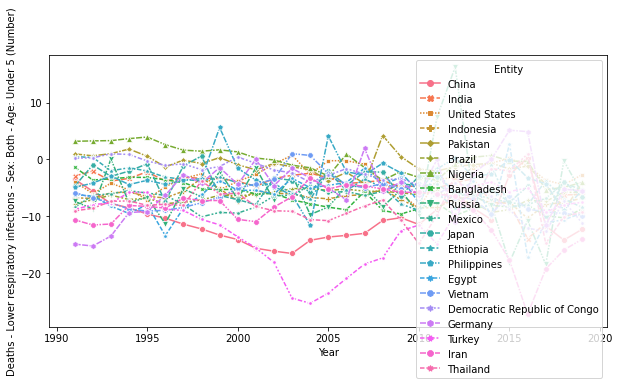

In [21]:
# Creamos una figura y ejes con determinadas dimensiones (que están en pulgadas o inches) 
# y si queremos que sea nítida sin tener que poner dimensiones gigantes, le asignamos 
# a la figura una densidad de pixeles (dpi) de 300

fig, ax = plt.subplots(
    figsize = (10,5), # 10 in de ancho y 5 in de alto
    #dpi= 300  # densidad de pixeles de 300
)

# Para crear una linea se una lineplot de Seaborn
sns.lineplot(data=df_final_pct_change, # Datos a usar y mapead
             x='Year', # Lo que estará en el eje x
             y='Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)', # y en el eje y
             markers= True, #¿Queremos marcadores diferentes para cada uno? Si -> True, No -> False
             hue='Entity', # Que los colores estén dados por el país
             style='Entity', # Así como el estilo de la línea
             ax=ax # Asignar este plot a los ejes ax. Pueden haber más ejes en una figura.
            )


plt.show() # Mostrar nuestra figura

Podemos notar que el gráfico es un pequeño desastre y no es algo que nos sorprenda, pero podemos mejorarlo un poco al hacer unos cuantos cambios:

1. Escribir un título lo suficientemente claro de tal manera que no sean necesarios títulos largos en los ejes (o de preferencia no poner).
2. Agregar el símbolo de porcentaje al eje _y_ para ser aún más claros.
3. Cambiar la posición de la leyenda (que se encuentra fuera de los ejes del gráfico) y el número de columnas de nombres.
4. Eliminar líneas externas del gráfico para que se vea un poco más limpio.
5. Agregar líneas horizontales del grid para una mejor ubicación de los valores


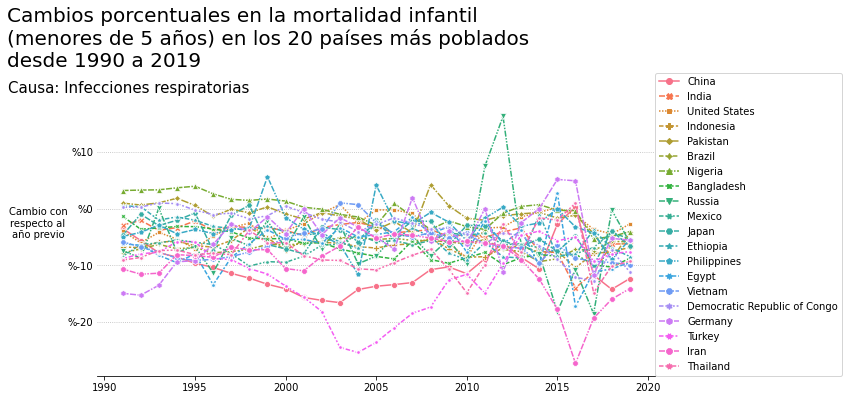

In [22]:
fig, ax = plt.subplots(
    figsize = (10,5), # 10 in de ancho y 5 in de alto
    #dpi= 300 # densidad de pixeles de 300
)

# Líneas
sns.lineplot(data=df_final_pct_change, # Datos a usar y mapead
             x='Year', # Lo que estará en el eje x
             y='Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)', # y en el eje y
             markers= True, #¿Queremos marcadores diferentes para cada uno? Si -> True, No -> False
             hue='Entity', # Que los colores estén dados por el país
             style='Entity', # Así como el estilo de la línea
             ax=ax # Asignar este plot a los ejes ax. Pueden haber más ejes en una figura.
            )


# Título
fig.suptitle("Cambios porcentuales en la mortalidad infantil\n(menores de 5 años) en los 20 países más poblados\ndesde 1990 a 2019",
             x=0, y=1.15, # posición relativa a la figura 
             ha='left', # Alineamiento del texto,
             size = 20 # Tamaño de las letras
            )
# Subtítulo
ax.set_title("Causa: Infecciones respiratorias",
             x=-0.16, y=1.02, ha = 'left', # Alineado al título
             size = 15, # Menor tamaño al título
            )

# Eliminar nombres a los ejes x y y
ax.set_ylabel("Cambio con\nrespecto al\naño previo", rotation=0, labelpad=30)
ax.set_xlabel("")

# Símbolo de porcentaje en eje y
ax.yaxis.set_major_formatter('%{x:1.0f}')

# Posicionar la legenda fuera de los ejes
ax.legend(loc=(1,0), ncol=1)


# Eliminar las línas externas del gráfico (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Eliminar ticks del eje y
ax.tick_params(axis='y', length=0)

# Agregar línas horizontales (eje y)  del grid
ax.grid(axis='y', color='black', ls=':', alpha=0.3)

plt.show()

De esta manera tenemos un gráfico un poco más limpio, pero podemos acomodar las cosas mejor:

1. La posición de la leyenda puede ir arriba del gráfico, ya que el movimiento de los ojos al leer es casi siempre de arriba hacia abajo. Además, eliminar o reducir a cero el ancho del borde de la legenda.
2. Cambiar el orden de las variables categoricas. Empezando de la mayor a la menor población.
3. Cambiar la paleta de colores de los países. Seguirá siendo un _spaghetti_ pero tendra colores bonitos. Para el cambio de paleta de colores tenemos dos maneras: 
    * Elegir un [**colormap**](https://matplotlib.org/stable/tutorials/colors/colormaps.html) predeterminado de Matplotlib o alguno de Seaborn (hay unos muy bonitos a mi parecer)
    * Elegir manualmente 20 colores: Esta opción no es mala, existen muchos recursos que ofrecen paletas de colores, pero puede ser demasiado tediosa. Esto ya depende de la paciencia de cada quien.

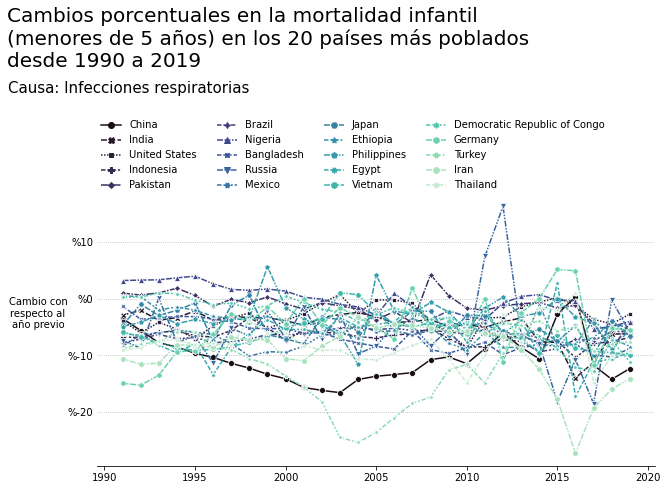

In [23]:
fig, ax = plt.subplots(
    figsize = (10,5), # 10 in de ancho y 5 in de alto
    #dpi= 300 # densidad de pixeles de 300
)

# Líneas
sns.lineplot(data=df_final_pct_change, # Datos a usar y mapead
             x='Year', # Lo que estará en el eje x
             y='Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)', # y en el eje y
             markers= True, #¿Queremos marcadores diferentes para cada uno? Si -> True, No -> False
             hue='Entity', # Que los colores estén dados por el país
             style='Entity', # Así como el estilo de la línea
             ax=ax,  # Asignar este plot a los ejes ax. Pueden haber más ejes en una figura.
             palette = 'mako' # Paleta de colores de Seaborn
            )


# Título
fig.suptitle("Cambios porcentuales en la mortalidad infantil\n(menores de 5 años) en los 20 países más poblados\ndesde 1990 a 2019",
             x=0, y=1.4, # movemos más arriba el título y subtitulo 
             ha='left', # Alineamiento del texto,
             size = 20 # Tamaño de las letras
            )
# Subtítulo
ax.set_title("Causa: Infecciones respiratorias",
             x=-0.16, y=1.35, ha = 'left', # Alineado al título
             size = 15, # Menor tamaño al título
            )

# Eliminar nombres a los ejes x y y
ax.set_ylabel("Cambio con\nrespecto al\naño previo", rotation=0, labelpad=30)
ax.set_xlabel("")

# Símbolo de porcentaje en eje y
ax.yaxis.set_major_formatter('%{x:1.0f}')

# Posicionar la legenda fuera de los ejes y eliminar el contorno de la legenda
ax.legend(loc=(0,1), ncol=4).get_frame().set_linewidth(0)



# Eliminar las línas externas del gráfico (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Eliminar ticks del eje y
ax.tick_params(axis='y', length=0)

# Agregar línas horizontales (eje y)  del grid
ax.grid(axis='y', color='black', ls=':', alpha=0.3)

plt.show()


Personalmente me gusta cambiar la fuente de las letras, mis fuentes favoritas son <span style="font-family:Georgia"><b>Georgia</b></span> y <span style="font-family:Palatino"><b>Palatino</b></span> así que usaré una de esas.

Para esto se puede agregar a en cada función donde haya texto o se pone de manera global a través de la siguiente línea de código.

```Python
plt.rc('font', family='FONT_NAME')
```


> Hacer este cambio puede que se tengan que modificar tamaños de letras, posiciones de textos e inclusive si algunos textos cambian de formato (**negrita** o _italica_)

Algo a tomar en cuenta cuando se exporta la imagen es el color del fondo, tanto en los ejes como el de la figura y la leyenda. Esta propiedad es el **`facecolor`**

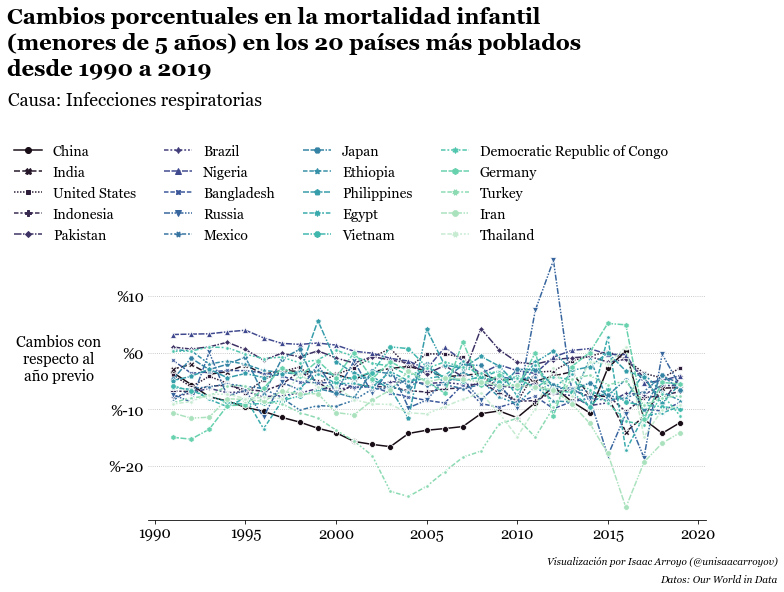

In [27]:
plt.rc('font', family='Georgia')

fig, ax = plt.subplots(figsize = (10,5), facecolor = 'white',
                       #dpi= 300
                      )

# Líneas
sns.lineplot(data=df_final_pct_change, x='Year',
             y='Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
             markers= True, hue='Entity', style='Entity', ax=ax, palette = 'mako')


# Título
fig.suptitle("Cambios porcentuales en la mortalidad infantil\n(menores de 5 años) en los 20 países más poblados\ndesde 1990 a 2019",
             x=-0.07, y=1.55, ha='left', size = 22, fontweight="bold")
# Subtítulo
ax.set_title("Causa: Infecciones respiratorias", x=-0.25, y=1.5, ha = 'left', size = 18)

# Eliminar nombres a los ejes x y y
ax.set_ylabel("Cambios con\nrespecto al\naño previo", rotation=0, size=15, labelpad=50)
ax.set_xlabel("")

# Hacer más grandes el texto de los ejes
ax.tick_params(labelsize=15)

# Símbolo de porcentaje en eje y
ax.yaxis.set_major_formatter('%{x:1.0f}')

# Posicionar la legenda fuera de los ejes y eliminar el contorno de la legenda
ax.legend(loc=(-0.25,1), ncol=4, prop={'size':14}).get_frame().set_linewidth(0)

# Eliminar las línas externas del gráfico (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Eliminar ticks del eje y
ax.tick_params(axis='y', length=0)

# Agregar línas horizontales (eje y)  del grid
ax.grid(axis='y', color='black', ls=':', alpha=0.3)

# EXTRA: Una caption donde se diga el autor de la visualización así como la fuente de los datos
fig.text(x=1,y=0,s='Visualización por Isaac Arroyo (@unisaacarroyov)', fontdict={'style':'italic', 'ha':'right'})
fig.text(x=1,y=-0.05,s='Datos: Our World in Data', fontdict={'style':'italic', 'ha':'right'})


plt.show()

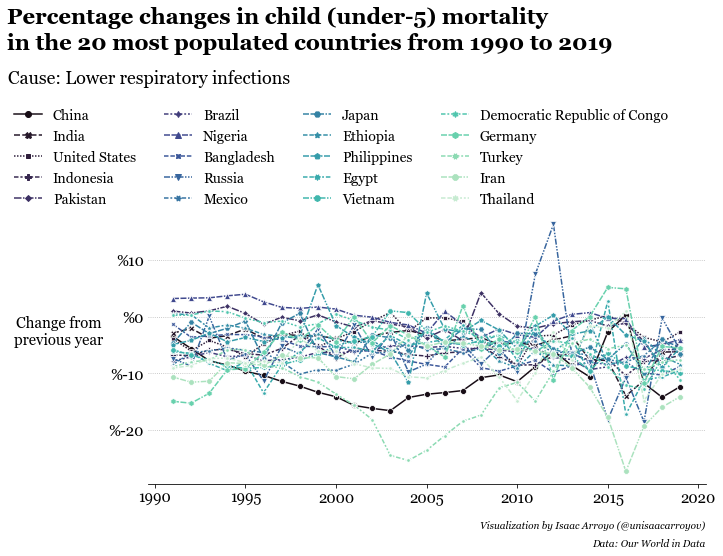

In [35]:
# English version
plt.rc('font', family='Georgia')

fig, ax = plt.subplots(figsize = (10,5), facecolor = 'white',
                       #dpi= 300
                      )

# Líneas
sns.lineplot(data=df_final_pct_change, x='Year',
             y='Deaths - Lower respiratory infections - Sex: Both - Age: Under 5 (Number)',
             markers= True, hue='Entity', style='Entity', ax=ax, palette = 'mako')


# Título
fig.suptitle("Percentage changes in child (under-5) mortality\nin the 20 most populated countries from 1990 to 2019",
             x=-0.07, y=1.45, ha='left', size = 22, fontweight="bold")
# Subtítulo
ax.set_title("Cause: Lower respiratory infections", x=-0.25, y=1.45, ha = 'left', size = 18)

# Eliminar nombres a los ejes x y y
ax.set_ylabel("Change from\nprevious year", rotation=0, size=15, labelpad=50)
ax.set_xlabel("")

# Hacer más grandes el texto de los ejes
ax.tick_params(labelsize=15)

# Símbolo de porcentaje en eje y
ax.yaxis.set_major_formatter('%{x:1.0f}')

# Posicionar la legenda fuera de los ejes y eliminar el contorno de la legenda
ax.legend(loc=(-0.25,1), ncol=4, prop={'size':14}).get_frame().set_linewidth(0)

# Eliminar las línas externas del gráfico (spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# Eliminar ticks del eje y
ax.tick_params(axis='y', length=0)

# Agregar línas horizontales (eje y)  del grid
ax.grid(axis='y', color='black', ls=':', alpha=0.3)

# EXTRA: Una caption donde se diga el autor de la visualización así como la fuente de los datos
fig.text(x=0.9,y=0,s='Visualization by Isaac Arroyo (@unisaacarroyov)', fontdict={'style':'italic', 'ha':'right'})
fig.text(x=0.9,y=-0.05,s='Data: Our World in Data', fontdict={'style':'italic', 'ha':'right'})


plt.show()